## Reply Count for Topics with Time Filter

C:\Users\20243898\AppData\Local\Temp\ipykernel_3560\1925841063.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(csv_path, parse_dates=[DATE_COL], low_memory=False)
C:\Users\20243898\AppData\Local\Temp\ipykernel_3560\1925841063.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(csv_path, parse_dates=[DATE_COL], low_memory=False)


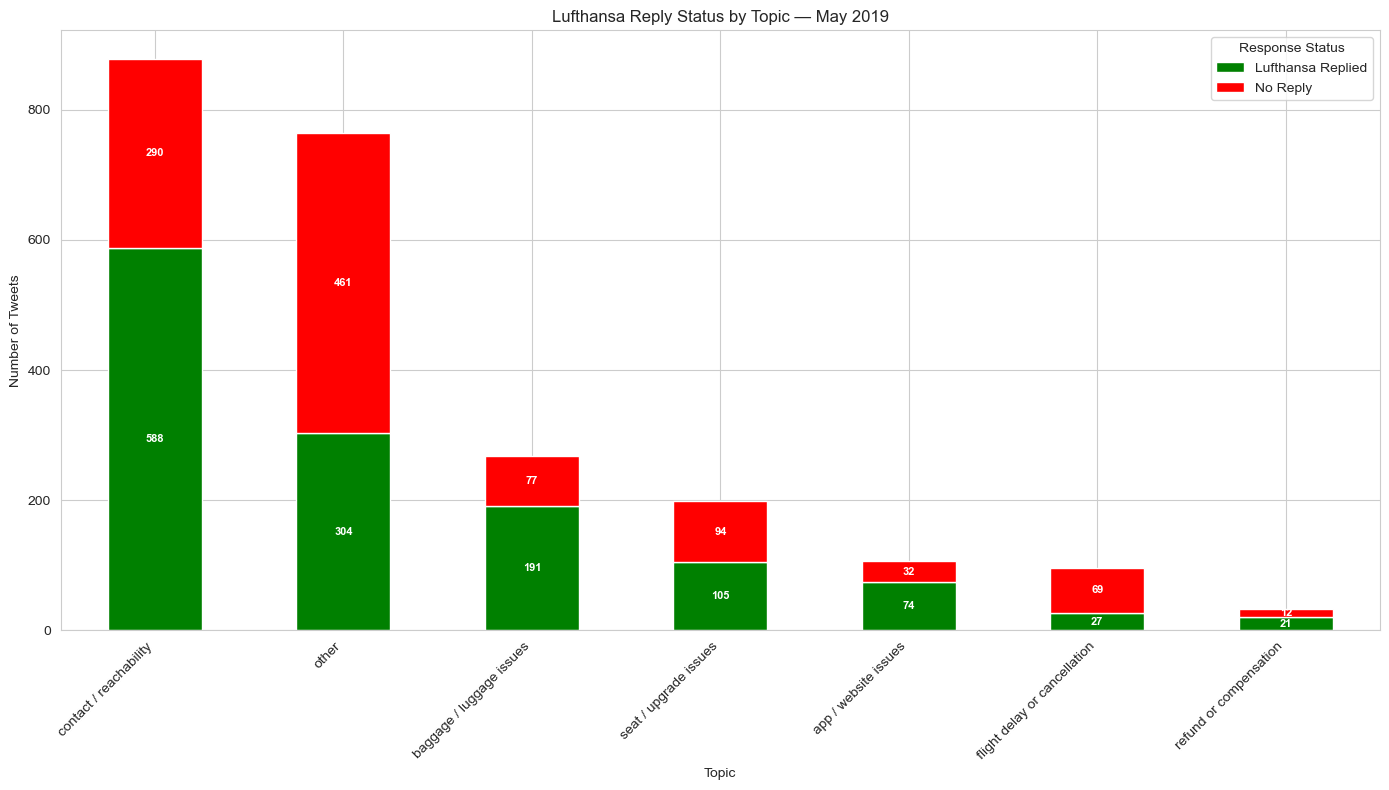

Plot saved to: C:\Users\20243898\Downloads\lufthansa_topic_reply_status_monthly\lufthansa_reply_status_2019_05.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime

# configuration
TARGET_YEAR  = 2019          # year to filter
TARGET_MONTH = 5             # month to filter

# define exact name of the column in your CSVs that contains the topic labels
TOPIC_COL    = 'primary_topic'
#define the name of the date column in your CSVs 
DATE_COL     = 'created_at'

REPLIED_CSV      = Path(r"C:/Users/20243898/Downloads/tweets_classified_Lufthansa.csv")
NOT_REPLIED_CSV  = Path(r"C:/Users/20243898/Downloads/tweets_wo_reply_classified.csv")
OUT_DIR          = Path.home() / 'Downloads' / 'lufthansa_topic_reply_status_monthly'
OUT_DIR.mkdir(exist_ok=True, parents=True)

# helpers
def topic_counts(csv_path: Path) -> pd.Series:
    """Return tweet-count per topic for TARGET_YEAR / TARGET_MONTH."""
    df = pd.read_csv(csv_path, parse_dates=[DATE_COL], low_memory=False)
    mask = (df[DATE_COL].dt.year == TARGET_YEAR) & (df[DATE_COL].dt.month == TARGET_MONTH)
    return (
        df.loc[mask, TOPIC_COL]
        .fillna('Unknown Topic')
        .astype('category')
        .value_counts()
    )

# loading the data
replied     = topic_counts(REPLIED_CSV).rename('Lufthansa Replied')
not_replied = topic_counts(NOT_REPLIED_CSV).rename('No Reply')

plot_df = (
    pd.concat([replied, not_replied], axis=1)
      .fillna(0)
      .astype(int)
      .assign(total=lambda x: x.sum(axis=1))
      .sort_values('total', ascending=False)
      .drop(columns='total')
      .head(15)                               
)

# plotting the graph
ax = plot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    color={'Lufthansa Replied': 'green', 'No Reply': 'red'}
)

month_name = datetime(TARGET_YEAR, TARGET_MONTH, 1).strftime('%B %Y')
ax.set(
    title=f'Lufthansa Reply Status by Topic — {month_name}',
    ylabel='Number of Tweets',
    xlabel='Topic'
)
ax.legend(title='Response Status')
plt.xticks(rotation=45, ha='right')

# add data labels
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(v.get_height()):,}' if v.get_height() else '' for v in container],
                 label_type='center', fontsize=8, color='white', weight='bold')

plt.tight_layout()
fname = OUT_DIR / f'lufthansa_reply_status_{TARGET_YEAR}_{TARGET_MONTH:02d}.png'
plt.savefig(fname)
plt.show()

print(f'Plot saved to: {fname}')
